In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pd.options.display.max_columns=200
#pd.options.display.max_rows=200

# DATASET

-  BALANCE : Balance amount left in customers account to make purchases
-  BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
-  PURCHASES : Amount of purchases made from account
-   PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
-  ONEOFF_PURCHASES : Maximum purchase amount done in one-go
-   ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
-   INSTALLMENTS_PURCHASES : Amount of purchase done in installment
-   CASH_ADVANCE : Cash in advance given by the user
-   PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
-   CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
-   CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
-   PURCHASES_TRX : Numbe of purchase transactions made
-   CREDIT_LIMIT : Limit of Credit Card for user
-   PAYMENTS : Amount of Payment done by user
-   MINIMUM_PAYMENTS : Minimum amount of payments made by user
-  PRCFULLPAYMENT : Percent of full payment paid by user
-  TENURE : Tenure of credit card service for user


In [3]:
# loading the dataset
cc=pd.read_csv("data_credit_card_customer_seg.csv")
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# shape
cc.shape

(8950, 18)

In [5]:
# mathematical features
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:

# null values
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# % of null values
round(cc.isnull().sum()*100/len(cc),4)

CUST_ID                             0.0000
BALANCE                             0.0000
BALANCE_FREQUENCY                   0.0000
PURCHASES                           0.0000
ONEOFF_PURCHASES                    0.0000
INSTALLMENTS_PURCHASES              0.0000
CASH_ADVANCE                        0.0000
PURCHASES_FREQUENCY                 0.0000
ONEOFF_PURCHASES_FREQUENCY          0.0000
PURCHASES_INSTALLMENTS_FREQUENCY    0.0000
CASH_ADVANCE_FREQUENCY              0.0000
CASH_ADVANCE_TRX                    0.0000
PURCHASES_TRX                       0.0000
CREDIT_LIMIT                        0.0112
PAYMENTS                            0.0000
MINIMUM_PAYMENTS                    3.4972
PRC_FULL_PAYMENT                    0.0000
TENURE                              0.0000
dtype: float64

In [9]:
# column information
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
# checking for columns with null values
cc.loc[:, cc.isnull().any()]

,CREDIT_LIMIT,MINIMUM_PAYMENTS
0,1000.0,139.509787
1,7000.0,1072.340217
2,7500.0,627.284787
3,7500.0,NaN
4,1200.0,244.791237
...,...,...
8945,1000.0,48.886365
8946,1000.0,NaN
8947,1000.0,82.418369
8948,500.0,55.755628


In [11]:
#df.dropna(subset=['Name'])

cc=cc.dropna(subset=["CREDIT_LIMIT"])

# dropping the one row of null value.

In [12]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# we see that there are columns where "MINIMUM_PAYMENTS"=null but PAYMENTS has some value
# so we assume that the customers with null min_payment have not pais, so converting the values to zero.

In [14]:
#df1 = df[df.isna().any(axis=1)]
ccnull=cc[cc.isna().any(axis=1)]

In [15]:
ccnull[ccnull["MINIMUM_PAYMENTS"].isnull() & ccnull["PAYMENTS"]!=0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
54,C10056,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
146,C10152,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
319,C10330,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,C18794,3.229304,0.545455,190.20,0.00,190.20,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1500.0,295.937124,NaN,0.0,12
8593,C18827,16.887571,0.363636,1083.00,1083.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
8647,C18882,0.006651,0.142857,0.00,0.00,0.00,164.137866,0.000000,0.000000,0.000000,0.142857,1,0,1200.0,5.070726,NaN,0.0,7
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12


In [16]:
# we see that 

In [18]:
cc['MINIMUM_PAYMENTS'].fillna(cc['MINIMUM_PAYMENTS'].mean(), inplace=True)
#cc["MINIMUM_PAYMENTS"]=cc["MINIMUM_PAYMENTS"].fillna(mean)

In [19]:
# now we do not have any null values.
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
# Code for getting al null values.

In [21]:
# inspecting only monetory columns
cc[["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]]

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,0.00,95.40,0.000000,1000.0,201.802084,139.509787
1,3202.467416,0.00,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,773.17,0.00,0.000000,7500.0,622.066742,627.284787
3,1666.670542,1499.00,1499.00,0.00,205.788017,7500.0,0.000000,864.304943
4,817.714335,16.00,16.00,0.00,0.000000,1200.0,678.334763,244.791237
...,...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.00,291.12,0.000000,1000.0,325.594462,48.886365
8946,19.183215,300.00,0.00,300.00,0.000000,1000.0,275.861322,864.304943
8947,23.398673,144.40,0.00,144.40,0.000000,1000.0,81.270775,82.418369
8948,13.457564,0.00,0.00,0.00,36.558778,500.0,52.549959,55.755628


In [22]:
cc[["PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,95.40,0.00,95.4
1,0.00,0.00,0.0
2,773.17,773.17,0.0
3,1499.00,1499.00,0.0
4,16.00,16.00,0.0


In [23]:
# we see that PURCHASES=ONEOFF_PURCHASES+INSTALLMENTS_PURCHASES
# since custering involves grouping of similar attributes we can delete 
#ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES

In [24]:
# dropping the columns
#cc1=cc.drop(["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"],axis=1)

In [25]:
# inspecting only the frequrncy columns
cc[["BALANCE_FREQUENCY","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY",]].head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
0,0.818182,0.166667,0.000000,0.083333,0.000000
1,0.909091,0.000000,0.000000,0.000000,0.250000
2,1.000000,1.000000,1.000000,0.000000,0.000000
3,0.636364,0.083333,0.083333,0.000000,0.083333
4,1.000000,0.083333,0.083333,0.000000,0.000000


In [26]:
# inspecting the data set with below condition.
cc[cc["CASH_ADVANCE"]!=0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12
16,C10017,2072.074354,0.875000,0.00,0.00,0.00,2784.274703,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,391.974562,376.579631,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8938,C19179,78.818407,0.500000,0.00,0.00,0.00,1113.186078,0.000000,0.000000,0.000000,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6
8939,C19180,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.000000,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.000000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [27]:
# inspecting the data set with below condition
cc[cc["PURCHASES_TRX"]==12]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.000000,12
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.0,1.000000,0.000000,1.000000,0.0,0,12,4000.0,1053.980464,12465.549380,0.000000,12
25,C10026,169.781679,1.000000,399.60,0.00,399.60,0.0,1.000000,0.000000,1.000000,0.0,0,12,3000.0,215.306142,163.005536,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,C19003,708.315197,1.000000,2252.32,452.32,1800.00,0.0,0.818182,0.181818,0.727273,0.0,0,12,2500.0,2155.891761,208.895886,0.100000,11
8766,C19005,15.529084,0.909091,294.98,0.00,294.98,0.0,1.000000,0.000000,0.909091,0.0,0,12,1500.0,293.826005,46.022249,0.250000,11
8788,C19027,133.099445,1.000000,1170.00,0.00,1170.00,0.0,1.000000,0.000000,0.900000,0.0,0,12,1000.0,1068.502534,161.816503,0.444444,10
8794,C19034,59.101573,1.000000,786.00,0.00,786.00,0.0,1.000000,0.000000,0.900000,0.0,0,12,1000.0,664.059770,144.687135,1.000000,10


In [28]:
# these are the people, who pay with EMI.

In [29]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [30]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [31]:
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
ccm=cc[[ 'BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'CREDIT_LIMIT', 'PAYMENTS','TENURE']]

In [33]:
ccm.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,12
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,12
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,12
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,12
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,12


In [34]:
ccm.isnull().sum()

BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CREDIT_LIMIT              0
PAYMENTS                  0
TENURE                    0
dtype: int64

In [35]:
ccm.dtypes

BALANCE                   float64
PURCHASES                 float64
ONEOFF_PURCHASES          float64
INSTALLMENTS_PURCHASES    float64
CASH_ADVANCE              float64
CREDIT_LIMIT              float64
PAYMENTS                  float64
TENURE                      int64
dtype: object

In [36]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [37]:
cck = ccm[[ 'BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'CREDIT_LIMIT', 'PAYMENTS','TENURE']]

In [38]:
# 2. rescaling
cck = ccm[[ 'BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'CREDIT_LIMIT', 'PAYMENTS','TENURE']]

# instantiate
scaler = StandardScaler()

# fit_transform
cck_scaled = scaler.fit_transform(cck)
cck_scaled.shape

(8949, 8)

In [39]:
cck_scaled = pd.DataFrame(cck_scaled)
cck_scaled.columns = [[ 'BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'CREDIT_LIMIT', 'PAYMENTS','TENURE']]
cck_scaled.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE
0,-0.732054,-0.424934,-0.356957,-0.349114,-0.466805,-0.960380,-0.529026,0.360541
1,0.786858,-0.469584,-0.356957,-0.454607,2.605438,0.688601,0.818546,0.360541
2,0.447041,-0.107716,0.108843,-0.454607,-0.466805,0.826016,-0.383857,0.360541
3,0.049015,0.231995,0.546123,-0.454607,-0.368678,0.826016,-0.598733,0.360541
4,-0.358849,-0.462095,-0.347317,-0.454607,-0.466805,-0.905414,-0.364421,0.360541


In [40]:
pca = PCA(n_components = 2) 
cck_scaled_pr = pca.fit_transform(cck_scaled) 
cck_scaled_pr = pd.DataFrame(cck_scaled_pr) 
cck_scaled_pr.columns = ['P1', 'P2'] 


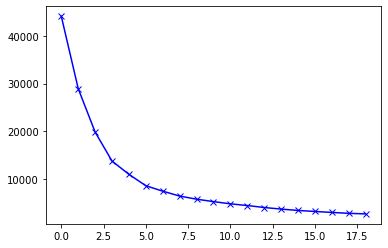

In [41]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(cck_scaled_pr)
    cost.append(kmean.inertia_)  
   
plt.plot(cost, 'bx-')

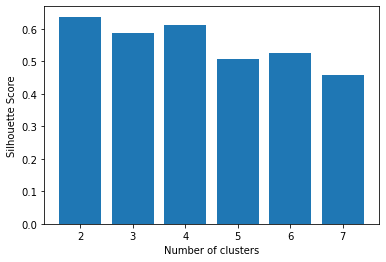

In [42]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append(   
        silhouette_score(cck_scaled_pr, KMeans(n_clusters = n_cluster).fit_predict(cck_scaled_pr))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    

In [43]:
#Applying k-Means with cluster as 3

In [44]:
db_default = KMeans(n_clusters=4, init='k-means++').fit(cck_scaled_pr) 
labels = db_default.labels_  

In [47]:
colours = {} 
colours[0] = 'r'
colours[1] = 'y'
colours[2] = 'g'
colours[3] = 'b'
#colours[4] = 'c'
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
#r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
#y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 

#g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(10, 10))  
plt.scatter(cck_scaled_pr['P1'], cck_scaled_pr['P2'], c = cvec) 
  
# Building the legend 
#plt.legend(('r', 'y', 'g'), ('Label 0','Label 1','Label 2')) 
#plt.legend(('r', 'y','g','b','c'), ('Label 0','Label 1','Label 2','Label 3','Label 4')) 
plt.legend(('r', 'y','g','b'), ('Label 0','Label 1','Label 2','Label 3')) 
plt.show() 

KeyError: 4

In [ ]:
clusters=pd.concat([cck, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

for cols in cck:
    g = sns.FacetGrid(clusters, col = 'cluster')
    g.map(plt.hist, cols)

In [ ]:
# assign the label
ccm['CLUST_ID'] = labels
ccm.head()

In [ ]:
#from sklearn import preprocessing, cross_validation, neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
# Putting feature variable to X
X = ccm.drop(['CLUST_ID'], axis=1)
X.head()

In [ ]:
y = ccm['CLUST_ID']

y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
clf=KNeighborsClassifier(n_neighbors=5)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
accuracy=clf.score(X_train, y_train)
print(accuracy)

In [ ]:
example=np.array([[900.714335,13.00,1600.0,0.0,0.000000,1400.0,668.334763,5000.791237]])
example=example.reshape(len(example),-1)

In [ ]:
prediction=clf.predict(example)
print(prediction)

In [ ]:
prob=clf.predict_proba(example)
print(prob)

In [ ]:
kmeans.labels_

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cck_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cck_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cck_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    


In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cck_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [ ]:
# final model with k=3
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(cck_scaled)

In [ ]:
kmeans.labels_

In [ ]:
# assign the label
#grouped_df['cluster_id'] = kmeans.labels_
#grouped_df.head()

cck_scaled['cluster_id'] = kmeans.labels_
cck_scaled.head()

X= np.cck_scaled.rand(50,2)
Y= 2 + np.cck_scaled.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)
 
#Transform the data
cck_pca = pca.fit_transform(cck_scaled)
 
cck_pca.shape

In [ ]:
cck_pca

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cck_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cck_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    


import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]

plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

In [ ]:
#filter rows of original data
cluster_0 = cck_scaled[kmeans.labels_ == 0]
cluster_1=cck_scaled[kmeans.labels_ == 1]
#cluster_2=cck_scaled[kmeans.labels_ == 2]
#plotting the results
plt.figure(figsize=(15,10))
plt.scatter(cluster_0.iloc[:, 0] , cluster_0.iloc[:, 1], color='red')
plt.scatter(cluster_1.iloc[:, 0] , cluster_1.iloc[:, 1], color='blue')
#plt.scatter(cluster_2.iloc[:, 0] , cluster_2.iloc[:, 1], color='black')
plt.xlim(-3,20)
plt.ylim(-3,20)
plt.show()